# Importing data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\watson_healthcare_modified.csv")
train = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\watson_healthcare_modified.csv")
test = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\watson_shap_values_for_testset.csv")

In [15]:
pd.options.display.max_columns = None
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [61]:
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           592
        Yes           86
Male    No           885
        Yes          113
Name: Attrition, dtype: int64

# Plotting the data and seeing correlation

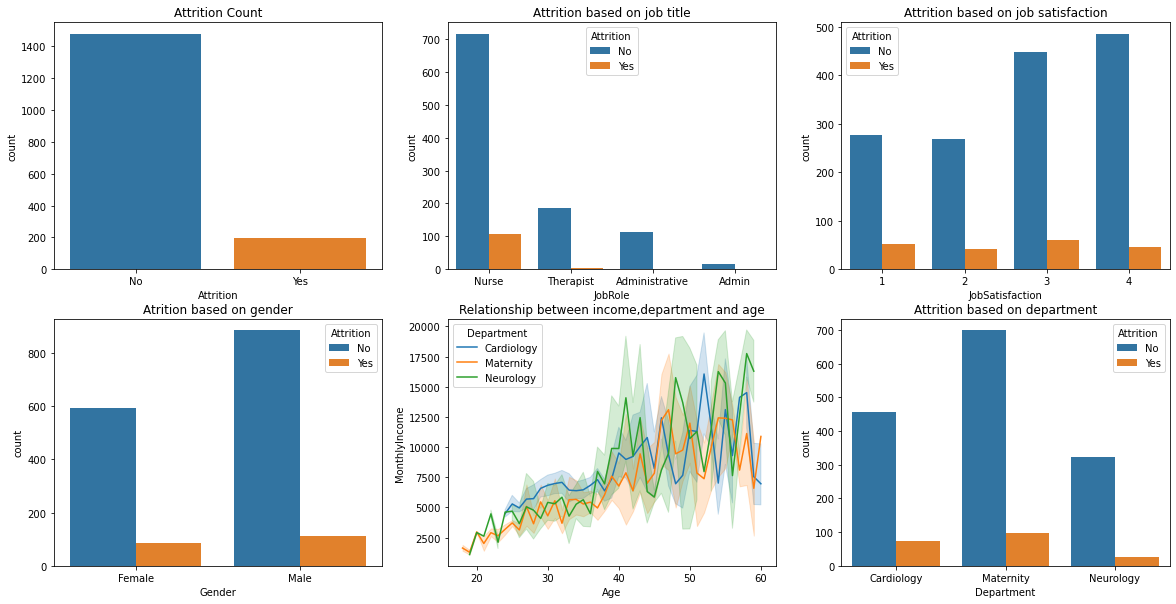

In [16]:
fig,ax = plt.subplots(nrows = 2,ncols = 3,figsize=(20,10))
sns.countplot(ax=ax[0,0],x = 'Attrition',data = df)
sns.countplot(ax=ax[0,1],x = 'JobRole',data = df[df['JobRole']!='Other'],hue='Attrition')
sns.countplot(ax=ax[0,2],x = 'JobSatisfaction',data = df,hue='Attrition')
sns.countplot(ax=ax[1,0],x = 'Gender',data = df,hue = 'Attrition');
sns.lineplot(ax=ax[1,1],x = 'Age',y='MonthlyIncome',data = df[df['JobRole']!='Other'],hue = 'Department');
sns.countplot(ax=ax[1,2],x = 'Department',data = df,hue='Attrition')

ax[0,0].title.set_text('Attrition Count')
ax[0,1].title.set_text('Attrition based on job title')
ax[0,2].title.set_text('Attrition based on job satisfaction')
ax[1,0].title.set_text('Atrition based on gender')
ax[1,1].title.set_text('Relationship between income,department and age')
ax[1,2].title.set_text('Attrition based on department')

plt.show()

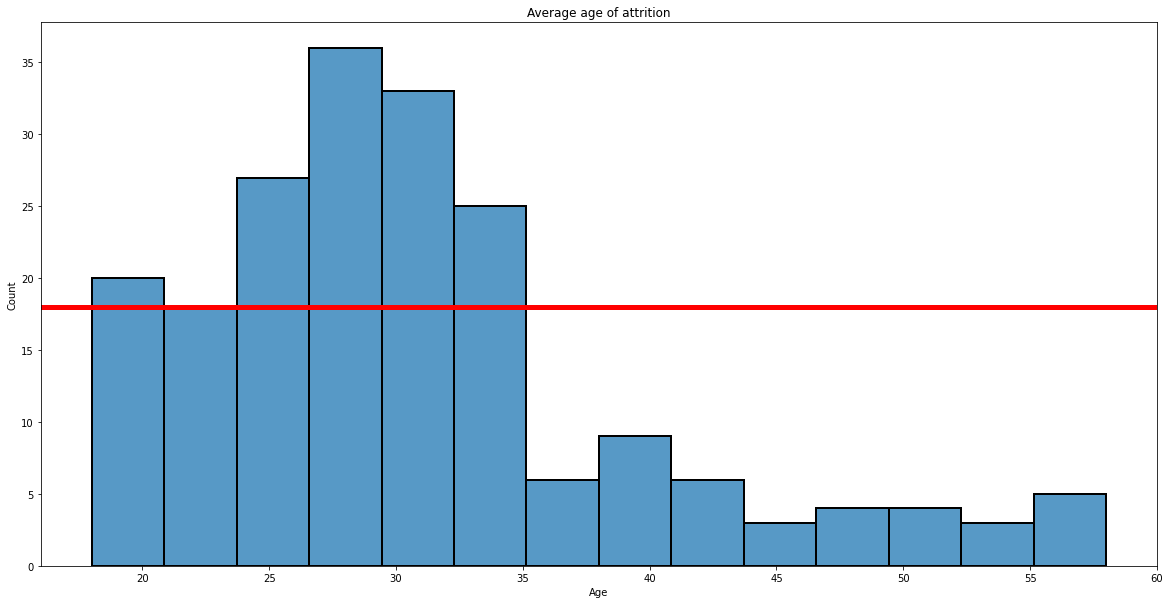

In [17]:
fig, ax = plt.subplots(figsize=(20,10));
ax.axhline(y=df['Age'].min(), color='red',linewidth=5);
sns.histplot(x='Age',data = df[df['Attrition']=='Yes'],linewidth=2)
plt.title('Average age of attrition')
plt.show()

# Transforming and preparing the data for machine learning

In [18]:
test.drop(columns = ['EmployeeID'],inplace = True)

In [19]:
train.drop(columns = ['EmployeeID','Over18'],inplace = True)

In [20]:
train = train[train['JobRole']!='Other']
train = train[train['EducationField']!='Other']

In [21]:
train['EducationField'].unique()

array(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree',
       'Human Resources'], dtype=object)

In [22]:
train['Attrition'].replace({'No':0,'Yes':1},inplace = True)
train['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2},inplace = True)
train['Department'].replace({'Cardiology':0,'Maternity':1,'Neurology':2},inplace = True)
train['Gender'].replace({'Female':0,'Male':1},inplace = True)
train['MaritalStatus'].replace({'Single':0,'Married':1,'Divorced':2},inplace = True)
train['OverTime'].replace({'No':0,'Yes':1},inplace = True)
train['JobRole'].replace({'Nurse':0,'Therapist':1,'Administrative':2,'Admin':3},inplace = True)
train['EducationField'].replace({'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Technical Degree':4,'Human Resources':5},inplace = True)

In [23]:
train['EducationField'].unique()

array([0, 1, 2, 4, 5], dtype=int64)

In [24]:
X = train.drop('Attrition',axis =1)
y = train['Attrition']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

 # Scaling the values for better accuracy

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest

In [27]:
rf_results = []
rf = RandomForestClassifier(n_estimators = 100,max_depth = 5)
rf.fit(X_train_scaled,y_train)
rf.predict(X_test_scaled)
rf.score(X_test_scaled,y_test)

rf_results.append(np.mean(cross_val_score(rf,X_test_scaled,y_test,cv=5)))
print(rf_results)

[0.9294638694638696]


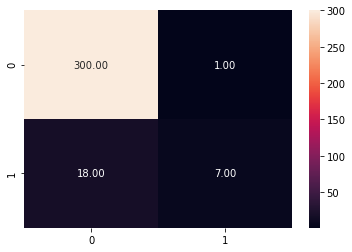

In [28]:
model_rf = rf.predict(X_test_scaled)
model_cms = confusion_matrix(y_test,model_rf)
sns.heatmap(data = model_cms,annot = True,fmt ='.2f')
plt.show()

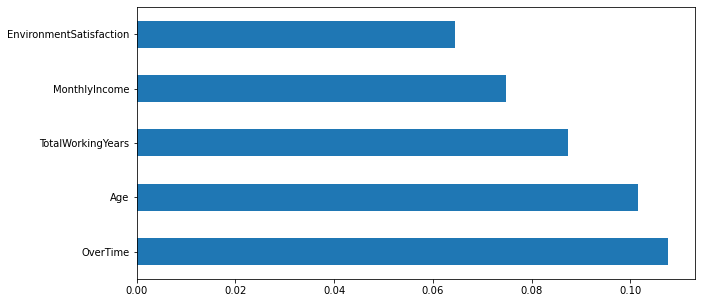

In [29]:
feat_importances = pd.Series(rf.feature_importances_,index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh',figsize=(10,5))
plt.show()

# Logistic regression

In [30]:
logreg = LogisticRegression()

log_reg_results = []

log= logreg.fit(X_train_scaled,y_train)
log.predict(X_test_scaled)
log.score(X_test_scaled,y_test)

log_reg_results.append(np.mean(cross_val_score(log,X_test_scaled,y_test,cv=5)))
print(log_reg_results)

[0.9294172494172495]


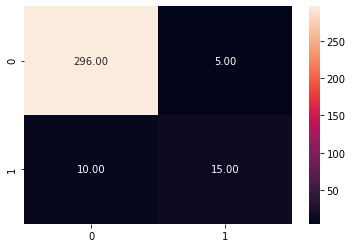

In [31]:
model_log = logreg.predict(X_test_scaled)
mode_cm_log = confusion_matrix(y_test,model_log)
sns.heatmap(data = mode_cm_log,annot = True,fmt ='.2f')
plt.show()

# Pytorch model

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(42)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 41)

In [53]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [54]:
class Model(nn.Module):
    def __init__(self,input_feature = 32,h1 = 50,h2 = 55,out = 2):
        super().__init__()
        self.fc1 = nn.Linear(input_feature,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [55]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [56]:
epoch = 300
losses = []

for i in range(epoch):
    y_preds = model.forward(X_train)
    loss = criterion(y_preds,y_train)
    
    losses.append(loss.detach().numpy())
    
    if i %10 ==0:
        print(f'Epoch{i} and loss: {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
                  

Epoch0 and loss: 5.48091983795166
Epoch10 and loss: 95.8553466796875
Epoch20 and loss: 19.718795776367188
Epoch30 and loss: 18.91213035583496
Epoch40 and loss: 3.753059148788452
Epoch50 and loss: 1.25516676902771
Epoch60 and loss: 0.6399351954460144
Epoch70 and loss: 0.4726856052875519
Epoch80 and loss: 0.38090842962265015
Epoch90 and loss: 0.3297173082828522
Epoch100 and loss: 0.30822890996932983
Epoch110 and loss: 0.3012145757675171
Epoch120 and loss: 0.294390469789505
Epoch130 and loss: 0.29029911756515503
Epoch140 and loss: 0.2868797779083252
Epoch150 and loss: 0.2842802107334137
Epoch160 and loss: 0.2822009325027466
Epoch170 and loss: 0.280400812625885
Epoch180 and loss: 0.278764933347702
Epoch190 and loss: 0.27883845567703247
Epoch200 and loss: 0.27568310499191284
Epoch210 and loss: 0.2746182680130005
Epoch220 and loss: 0.2764492332935333
Epoch230 and loss: 0.2775426506996155
Epoch240 and loss: 0.28076836466789246
Epoch250 and loss: 0.27114054560661316
Epoch260 and loss: 0.268175

# Plotting the results

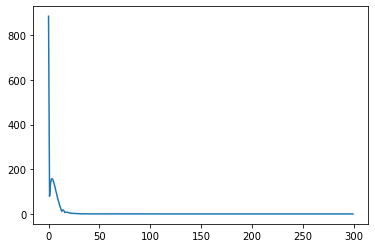

In [49]:
plt.plot(losses)
plt.show()

In [50]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)

In [51]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct+=1
print(f'Correct {correct}')


1.) tensor([-0.2672, -4.0179]) 	 0
2.) tensor([3.7830, 1.6956]) 	 0
3.) tensor([4.0339, 1.8596]) 	 0
4.) tensor([ 0.3548, -4.4128]) 	 0
5.) tensor([-0.2874, -3.3258]) 	 0
6.) tensor([-2.8584, -6.5219]) 	 0
7.) tensor([3.4883, 1.5030]) 	 0
8.) tensor([5.4376, 2.7769]) 	 0
9.) tensor([4.7056, 2.2986]) 	 0
10.) tensor([2.2872, 0.7180]) 	 0
11.) tensor([1.7324, 0.3554]) 	 0
12.) tensor([4.9487, 2.4575]) 	 0
13.) tensor([2.7942, 1.0493]) 	 0
14.) tensor([7.2105, 3.9357]) 	 0
15.) tensor([5.5552, 2.8538]) 	 0
16.) tensor([1.8752, 0.4487]) 	 1
17.) tensor([-0.6419, -2.7401]) 	 0
18.) tensor([2.9614, 1.1586]) 	 0
19.) tensor([ 0.2084, -2.3410]) 	 0
20.) tensor([-1.8437, -5.6819]) 	 0
21.) tensor([3.0451, 1.2133]) 	 0
22.) tensor([3.4311, 1.4656]) 	 0
23.) tensor([5.6297, 2.9025]) 	 0
24.) tensor([3.3502, 1.4127]) 	 0
25.) tensor([-1.8632, -7.0438]) 	 0
26.) tensor([4.1344, 1.9252]) 	 1
27.) tensor([6.1438, 3.2385]) 	 0
28.) tensor([ 1.4547, -1.1767]) 	 0
29.) tensor([3.6917, 1.6359]) 	 0
30.) 

# Summary

Overall, 88% of employees indicated they are not likely to leave their jobs, while 12% are likely to quit.

Specifically, Nurses were most likely to quit at 13%. Therapists were least likely at just 2%. Admin and Administrative roles fell in the middle at 6% and 1% likely to quit, respectively.

Additionally, the data showed a correlation between job satisfaction and attrition - as satisfaction increased, intention to leave decreased. Those least satisfied had 15.8% and 13.5% attrition rates, while the most satisfied group had only 8.5% likely to quit.

Finally, attrition intentions were similar between genders. Females were slightly higher at 12.7% compared to 11.3% for males. But the 1.4 percentage point difference suggests gender is not a major driver of turnover overall.

In summary, while 12% are likely to quit, the majority are staying. Nurses have the highest attrition rates while Therapists have the lowest. Increased job satisfaction appears to improve retention. Gender differences in attrition are minor.